In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

In [2]:
año_seleccionado=2011

In [3]:
data = pd.read_excel('datasets/MigrantesChile (2005-2016).xlsx')
selected_rows = data[data["Continent"] == 'America']
selected_columns = selected_rows[["Country",año_seleccionado]]
filtered_data = selected_columns[selected_rows['Country'].isin(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'])]
filtered_data.set_index('Country', inplace=True)

In [4]:
total_values = sum(filtered_data[año_seleccionado])
category_proportions = [(float(value) / total_values) for value in filtered_data[año_seleccionado]]

In [5]:
width = 60 # ancho del of chart
height = 15 # altura del chart
total_num_tiles = width * height # número total de celdas

In [6]:
# calcula la cantidad de celdas por categoría
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

In [7]:
# inicializa el waffle chart como una matriz vacía
waffle_chart = np.zeros((height, width))

# índices que recorren la estructura
category_index = 0
tile_index = 0

# poblar el waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # si el número de celdas para la categoría actual es igual a las celdas asignadas...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...se continúa con la siguiente categoría
            category_index += 1       
            
        # Se asigna el valor de la categoría actual a las coordenadas row,col
        waffle_chart[row, col] = category_index

<Figure size 640x480 with 0 Axes>

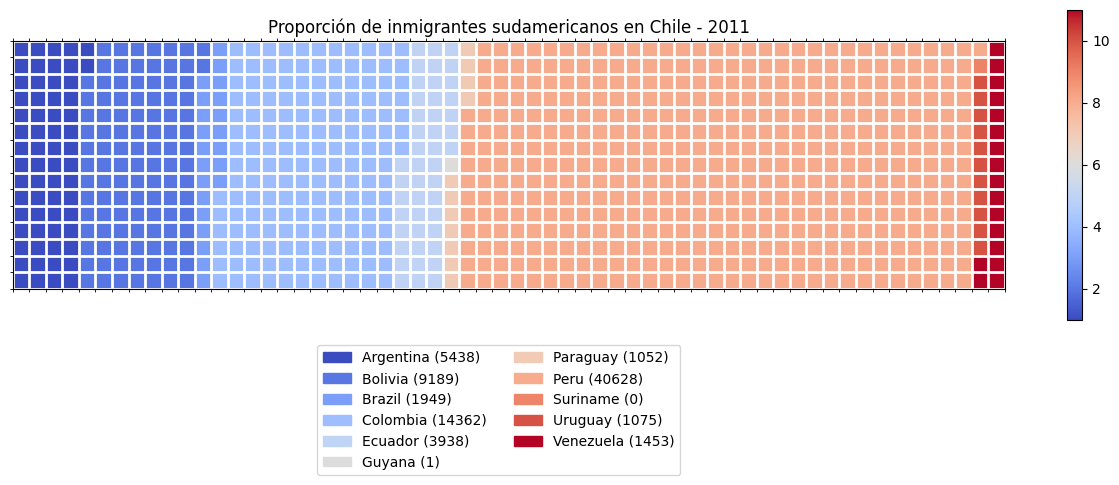

In [8]:
plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# Crea la leyenda para la parte superior
legend_handles_top = []
half_size = int(np.ceil(len(filtered_data) / 2))

for i, category in enumerate(filtered_data.index.values[:half_size]):
    label_str = category + ' (' + str(filtered_data[año_seleccionado][i]) + ')'
    color_val = colormap(float(i) / (filtered_data.shape[0] - 1))
    legend_handles_top.append(mpatches.Patch(color=color_val, label=label_str))

# Crea la leyenda para la parte inferior
legend_handles_bottom = []

for i, category in enumerate(filtered_data.index.values[half_size:]):
    label_str = category + ' (' + str(filtered_data[año_seleccionado][i + half_size]) + ')'
    color_val = colormap(float(i + half_size) / (filtered_data.shape[0] - 1))
    legend_handles_bottom.append(mpatches.Patch(color=color_val, label=label_str))

# Combina los handles de ambas leyendas
combined_handles = legend_handles_top + legend_handles_bottom

# Muestra la leyenda combinada en la posición deseada
plt.legend(handles=combined_handles,
           loc='upper left', 
           ncol=2,
           bbox_to_anchor=(0.3, -0.2)
          )

plt.title('Proporción de inmigrantes sudamericanos en Chile - ' + str(año_seleccionado))

plt.show()
